In [157]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#首先引入所有需要应用到的库
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


# 1.数据总览

In [158]:
#查看对应数据
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print( train_data.head(5) )
print( test_data.head(5) )

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [159]:
#由基础了解可知ID列值充当序列，可直接删除。
test_ID = test_data['Id']
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [160]:
#查看训练数据总览
train_data.info()
train_data.columns[train_data.isnull().any()]

#可以看出训练数据总行数1460行，其中LotFrontage物业的街道的线性英尺、Alley胡同通道的类型、MasVnrType砖石饰面类型、MasVnrArea砌面贴面面积、BsmtQual地下室的高度
#、Bsmtcond地下室的一般状况、BsmtExposure、BsmtFinType1地下室成品区域的质量、BsmtFinType2、
#Electrical电气系统、FireplaceQu壁炉质量、GarageType车库位置、GarageYrBlt车库年份、GarageFinish车库的内部装饰、GarageQual车库质量、GarageCond车库条件
#、PoolQC泳池质量、Fence围栏质量、MiscFeature杂项功能 19项存在缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [161]:
#查看测试数据总览
test_data.info()
test_data.columns[test_data.isnull().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

利用图形查看标签内容和相关数据关系

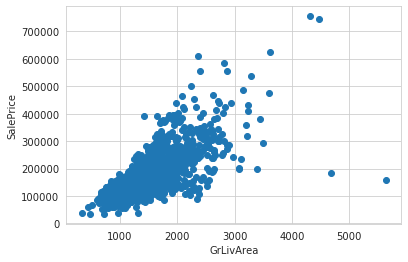

In [162]:
#首先利用业务了解利用图形分析常见数据关系，一般售价会与面积、房龄、房屋类型相关，首先查看面积和价格关系
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

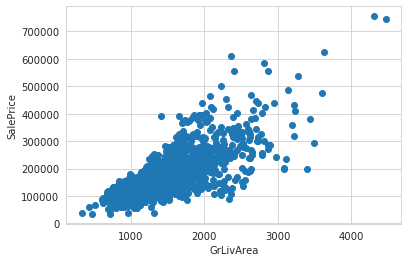

In [163]:
#根据房屋实际情况越大的房屋价值会整体偏高，由上图可查看到存在离群异常点，以4500为界
train_data = train_data[train_data['GrLivArea']<4500]
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()
#可以看出整体趋势房屋面积越大售价越高

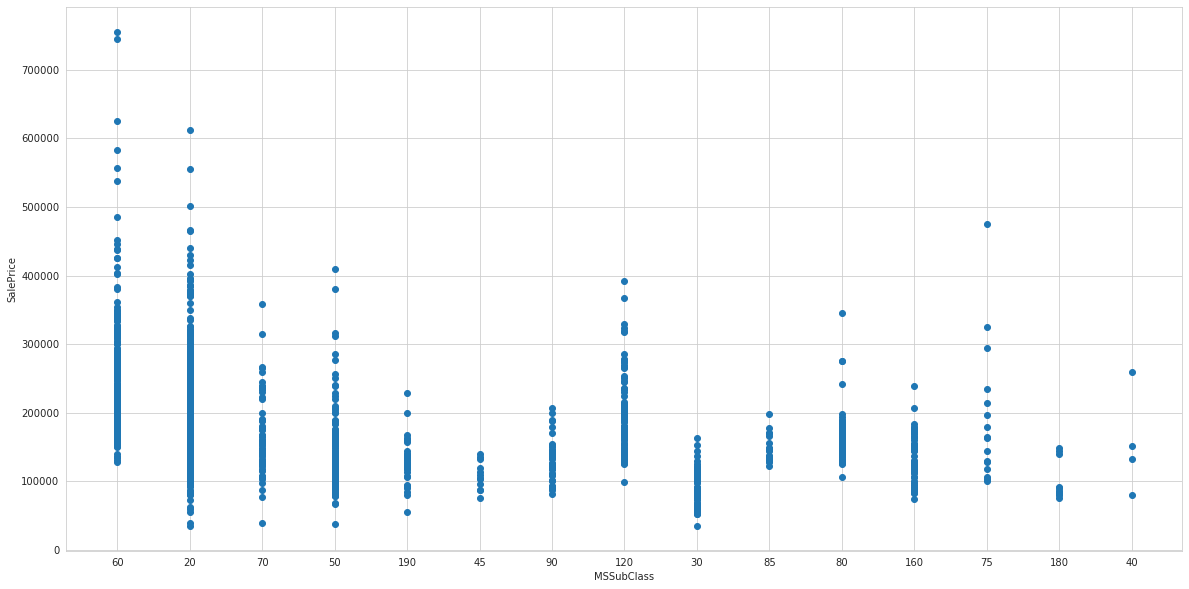

In [164]:
#MSSubClass通过文档说明表示房屋类型，先转换为字符型，查看各类型房屋的售价区间
train_data['MSSubClass']=train_data['MSSubClass'].astype('str')
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x = train_data['MSSubClass'], y = train_data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('MSSubClass')
plt.show()
#文档说明中描述20、60表示1946年后，30、70表示1945年前，可以看到新房比老房价格要高，且2层建筑比1层要高

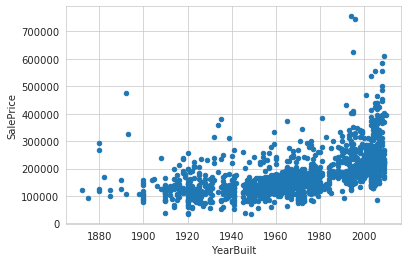

In [165]:
#价格与建筑年代
train_data.plot(kind = 'scatter',x = 'YearBuilt',y = 'SalePrice')
#可以看出建筑年代越近的售价越高

# 标签预处理

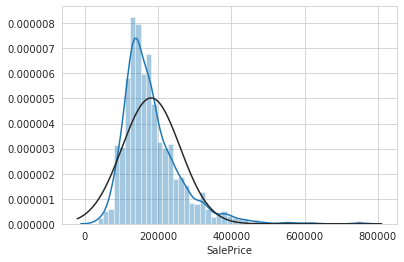

In [166]:
#首先查看目标变量,因很多模型假设数据是符合标准正态分布，先查看与标准正态分布拟合情况
sns.distplot(train_data['SalePrice'] , fit=norm)
#可以看出是右偏态的图，需要对目标变量进行变换，让其贴近正态分布

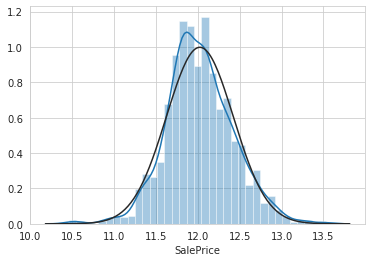

In [167]:
#变换正态分布一般可以尝试对数变换，倒数变换，平方根变换，BOX-COX变换
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
sns.distplot(train_data['SalePrice'] , fit=norm)
#查看变换后的分布,可观察到相对源数据有显著改观

#  特征工程

在进行特征工程的时候，我们需要对训练数据和测试数据进行分开处理。首先先对含有缺失值得特征进行处理。

In [168]:
#MSZoning为分区，绝大多数均为RL，可以直接取众数,此特征只有测试集缺失，所以只更改测试集。
train_data['MSZoning'].value_counts()
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0],inplace = True)

In [169]:
#距离街区的距离，取中位数
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(),inplace = True)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(),inplace = True)

In [170]:
#'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu'，
#'GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Fence','MiscFeature'此部分特征缺失值根据文档解释
#可以归纳为新的类别，且此部分训练集测试集均有缺失。
cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu',
'GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Fence','MiscFeature']
train_data[cols] = train_data[cols].fillna('newcatagory')
test_data[cols] = test_data[cols].fillna('newcatagory')

In [171]:
#Utilities属性基本全为AllPub，测试集缺失。
train_data['Utilities'].value_counts()
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0],inplace = True)

In [172]:
#MasVnrType砌体贴面类型和尺寸，少部分没录，可能是没有砌体贴面，用字段原有None取代。尺寸如无则用0
test_data['MasVnrType'].value_counts()
train_data["MasVnrType"].fillna("None",inplace = True)
train_data["MasVnrArea"].fillna(0,inplace = True)
test_data["MasVnrType"].fillna("None",inplace = True)
test_data["MasVnrArea"].fillna(0,inplace = True)

In [173]:
#sns.distplot(train_data['SalePrice'],fit = norm)
#查看变换后的分布,可观察到相对源数据有显著改观

In [174]:
#通过相关关系筛选部分特征与销售价格关系
#train_cor = train_data.corr()
#plt.figure(figsize=(10,10))
#sns.heatmap(train_cor)
#print(train_cor['SalePrice'].sort_values(ascending=False).head(11))

In [175]:
#Electrical电器系统，仅一个缺失值,查看相关数据用众数充填
train_data['Electrical'].value_counts()
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace=True)

In [176]:
#Exterior1st房屋外墙，仅一个缺失值,查看相关数据用众数充填
print (test_data['Exterior1st'].value_counts())
print (test_data['Exterior2nd'].value_counts())
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0],inplace=True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0],inplace=True)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64


In [177]:
#地下室相关信息，缺失值根据相关数据情况充填0
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
test_data[cols] = test_data[cols].fillna(0)

In [178]:
#整体功能
test_data['Functional'].value_counts()
test_data['Functional'].fillna(test_data['Functional'].mode()[0],inplace=True)

In [179]:
#厨房质量
test_data['KitchenQual'].value_counts()
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0],inplace=True)

In [180]:
#GarageYrBlt, GarageCars, GarageArea车库建筑年代，面积，车库内面积缺失查看数据一般是因没有车库导致，此处可以直接补充0
cols = ['GarageYrBlt', 'GarageCars', 'GarageArea']
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)
test_data[cols] = test_data[cols].fillna(0)

In [181]:
#销售类型缺失，直接补众数
test_data['SaleType'].value_counts()
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0],inplace=True)

In [182]:
train_data.columns[train_data.isnull().any()]
test_data.columns[test_data.isnull().any()]

Index([], dtype='object')

前面对缺失特征做了补充，现在分析特征之间的关系及特征的相关处理，如之前图形分析房屋类型时将int型变量转换为分类变量，以避免模型训练过程数值大小产生影响，现在进行特征转换时可将训练集测试集合并在一起转换

In [183]:
print(train_data.shape)
print(test_data.shape)
train_y_data = train_data['SalePrice'].values
all_data = pd.concat((train_data.drop('SalePrice',axis = 1),test_data)).reset_index(drop = True)

(1458, 80)
(1459, 79)


In [184]:
#将销售时间转换为时间序,可通过时间序做一定分析，分析之后列要删除，否则在交叉验证得分时会是nan
all_data['timesold'] = pd.to_datetime(all_data['YrSold'].astype('str')+'-'+all_data['MoSold'].astype('str'),format = '%Y-%m')
all_data.drop(['timesold'], axis = 1, inplace = True)

In [185]:
#浴室数量
all_data["TotalBath"] = all_data["FullBath"] + all_data["BsmtFullBath"] + 0.5 * (all_data["BsmtHalfBath"] + all_data["HalfBath"])
all_data.drop(['FullBath','BsmtFullBath','BsmtHalfBath','HalfBath'], axis = 1, inplace = True)

In [186]:
#总面积
all_data["TotalSF"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]

In [187]:
#变为稀疏的特性矩阵
all_data = pd.get_dummies(all_data)
print (all_data.shape)

(2917, 329)


In [188]:
train_data = all_data[:1458]
test_data = all_data[1458:]

In [189]:
#将数值数据标准化
from sklearn.preprocessing import StandardScaler
cols = train_data.select_dtypes(np.number).columns
train_data[cols] = StandardScaler().fit_transform(train_data[cols])
test_data[cols] = StandardScaler().fit_transform(test_data[cols])

## 模型融合及测试

In [190]:
#引入多种模型做测试，可加入网格搜索寻找最佳参数
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [191]:
ls = Lasso(alpha =0.0005)
rd = Ridge(alpha =0.0005)
rf = RandomForestRegressor(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,
                            min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
gb = GradientBoostingRegressor(n_estimators=500,learning_rate=0.0005,min_samples_split=3,
                                min_samples_leaf=2,max_depth=5,verbose=0)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.0005, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
 

In [192]:
ls_score = np.sqrt(-cross_val_score(ls, train_data.values, train_y_data, scoring="neg_mean_squared_error", cv = 5))
rd_score = np.sqrt(-cross_val_score(rd, train_data.values, train_y_data, scoring="neg_mean_squared_error", cv = 5))
rf_score = np.sqrt(-cross_val_score(rf, train_data.values, train_y_data, scoring="neg_mean_squared_error", cv = 5))
gb_score = np.sqrt(-cross_val_score(gb, train_data.values, train_y_data, scoring="neg_mean_squared_error", cv = 5))
lgb_score = np.sqrt(-cross_val_score(lgb, train_data.values, train_y_data, scoring="neg_mean_squared_error", cv = 5))


In [193]:
print (ls_score.mean())
print (rd_score.mean())
print (rf_score.mean())
print (gb_score.mean())
print (lgb_score.mean())

0.12029320563266625
0.12927628254757556
0.15901593747812767
0.32896095458628916
0.3465294088809484


In [194]:
#所以lasso算法效果最好
ls.fit(train_data,train_y_data)
y_model =ls.predict(test_data)

In [195]:
#将最终结果保存提交至竞赛平台
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = y_model
submit.to_csv('ls_reg.csv', index=None)